# Load data

In [1]:
library(readr)
Pretem <- read_csv("preterm.csv")
Preterm=Pretem

Rows: 1883 Columns: 25
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): attended.school, education, religion, ethinicity, attended.anc
dbl (20): id, preterm, mothers.age, Q409__1, Q409__2, Q409__3, Q409__4, Q409...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# load required packages

In [2]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(stringr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## Inspect data

In [3]:
glimpse(Preterm)

Rows: 1,883
Columns: 25
$ id                   <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15…
$ preterm              <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0…
$ mothers.age          <dbl> 35, 24, 31, 21, 17, 37, 18, 37, 31, 46, 28, 31, 3…
$ attended.school      <chr> "YES", "YES", "YES", "YES", "YES", "YES", "YES", …
$ education            <chr> "PRIMARY", "SECONDARY", "PRIMARY", "PRIMARY", "PR…
$ religion             <chr> "Protestant", "Catholic", "Muslim", "Muslim", "Mu…
$ ethinicity           <chr> "Basoga", "Basoga", "Basoga", "Basoga", "Basoga",…
$ attended.anc         <chr> "YES", "YES", "YES", "YES", "YES", "YES", "YES", …
$ Q409__1              <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ Q409__2              <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ Q409__3              <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0…
$ Q409__4              <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0…
$ Q409__5       

# Clean the data
## create new categorical variable from binary columns

In [4]:
Preterm$anc.attendant=as.factor(ifelse(Preterm$Q409__1==1,"Doctor",
                ifelse(Preterm$Q409__2==1,"Nurse",
                ifelse(Preterm$Q409__3==1,"Midwife",
                ifelse(Preterm$Q409__4==1,"Other",
                ifelse(Preterm$Q409__5==1,"Other",
                ifelse(Preterm$Q409__99==1,"Other",NA)))))))

Preterm$place.of.anc=as.factor(ifelse(Preterm$"Q410__1"==1,"Other",
                ifelse(Preterm$"Q410__2"==1,"Other",
                ifelse(Preterm$"Q410__3"==1,"Government Hospital",
                ifelse(Preterm$"Q410__4"==1,"Government Health Center",
                ifelse(Preterm$"Q410__5"==1,"Government Health Center",
                ifelse(Preterm$"Q410__6"==1,"Other Government Health Facility",
                ifelse(Preterm$"Q410__7"==1,"Private Hospital",
                ifelse(Preterm$"Q410__8"==1,"Other",
                ifelse(Preterm$"Q410__9"==1,"Other",
                ifelse(Preterm$"Q410__10"==1,"Other", NA)))))))))))

## Look at ethinicity

In [5]:
table(Preterm$ethinicity)


   Acholis    Baganda     Bagisu    Bagwere     Bakiga Banyankole    Banyole 
         2         98         18         59          3         15         62 
   Basamia     Basoga     Itesot  Jopadhola Karamajong      Langi    Lugubar 
        30       1507         28         21          1          3          1 
     Other 
        35 

## recategorize values for ethinicity

In [6]:
Preterm=Preterm%>%
  mutate(ethinicity=recode(ethinicity,
                           "Acholis"="Other",
                           "Bagisu"="Other",
                           "Bakiga"="Other",
                           "Banyankole"="Other",
                           "Itesot"="Other",
                           "Jopadhola"="Other",
                           "Karamajong"="Other",
                           "Langi"="Other",
                           "Lugubar"="Other"))

## inspect religion

In [7]:
table(Preterm$religion)


   Catholic      Muslim       Other Pentecostal  Protestant         SDA 
        159        1105           1         117         485          16 

**Other has only one observation, combine it with SDA and call it Other.**

## recategorize values for religion

In [8]:
Preterm=Preterm%>%
  mutate(religion=recode(religion,
                           "SDA"="Other"))

## remove columns that won't be used in analysis

In [9]:
Preterm=Preterm%>%
  select(-c(Q409__1:Q409__99, Q410__1:Q410__10))

# check for missing values

In [10]:
colSums(is.na(Preterm))

id              preterm          mothers.age 
                   0                    0                    0 
     attended.school            education             religion 
                   0                  175                    0 
          ethinicity         attended.anc number.of.anc.visits 
                   0                    0                    0 
       anc.attendant         place.of.anc 
                   0                    0

## replace NA values in education

In [11]:
Preterm=Preterm%>%
  replace_na(list(education="None"))

## confirm that there are no more NA values

In [12]:
anyNA(Preterm$education)

[1] FALSE

# Perform variable casting

In [13]:
Preterm$preterm=as.factor(Preterm$preterm)
Preterm$attended.school=as.factor(Preterm$attended.school)
Preterm$education=as.factor(Preterm$education)
Preterm$religion=as.factor(Preterm$religion)
Preterm$ethinicity=as.factor(Preterm$ethinicity)
Preterm$attended.anc=as.factor(Preterm$attended.anc)
Preterm$place.of.anc=as.factor(Preterm$place.of.anc)
Preterm$anc.attendant=as.factor(Preterm$anc.attendant)

## change all values in education to sentence case.

In [14]:
Preterm$education=str_to_sentence(Preterm$education)

# Visualize data

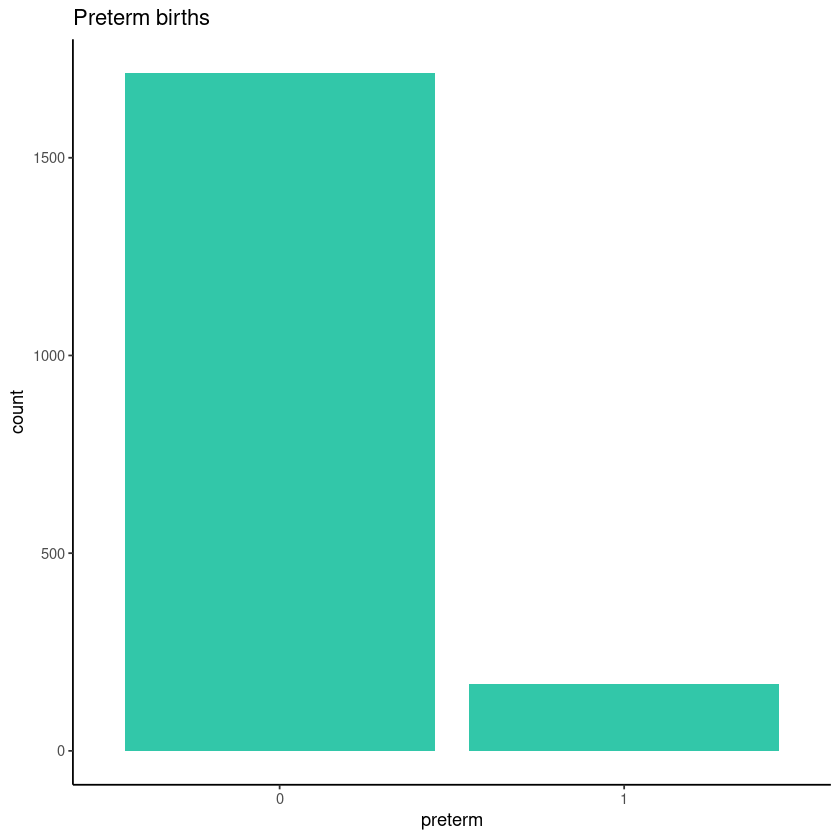

In [15]:
ggplot(Preterm,aes(preterm))+
  geom_bar(fill="#32C7A9")+
  labs(title = 'Preterm births')+
  theme_classic()

## education

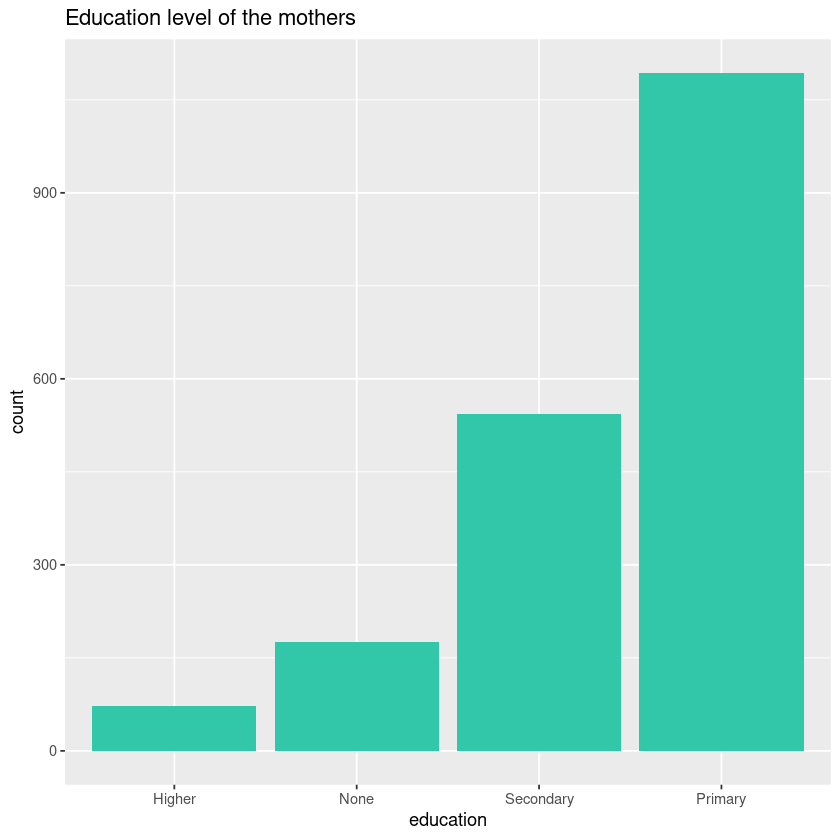

In [16]:
Preterm%>%
  group_by(education)%>%
  summarize(count=n())%>%
ggplot(aes(x = reorder(education,count), y = count))+
  geom_bar(stat="identity", fill="#32C7A9")+
  labs(x='education', title = 'Education level of the mothers')

## place.of.anc

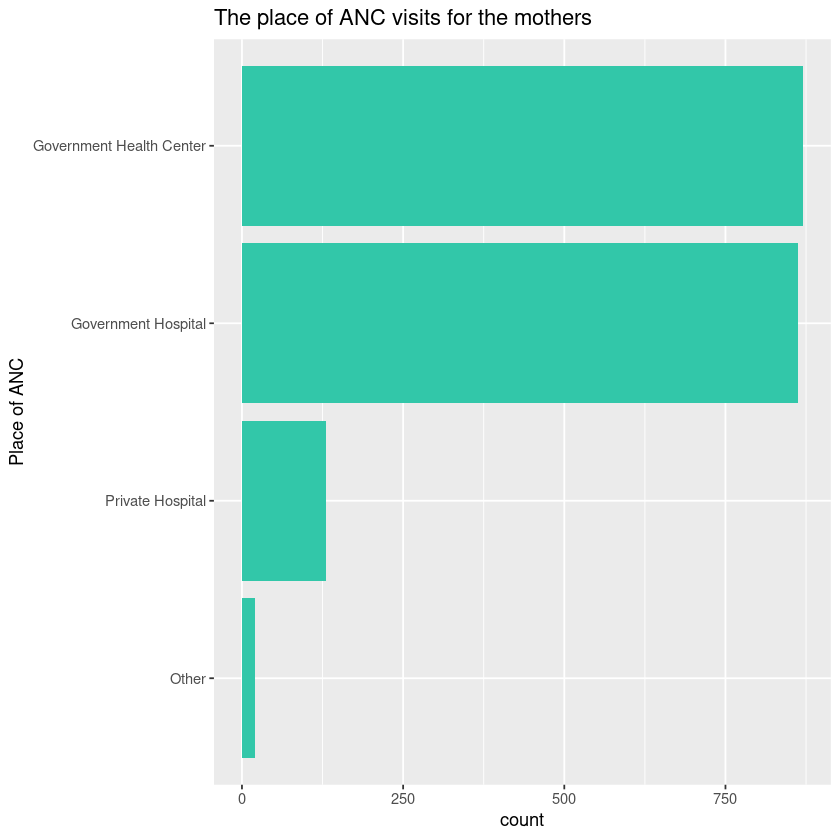

In [17]:
Preterm%>%
  group_by(place.of.anc)%>%
  summarize(count=n())%>%
ggplot(aes(x = reorder(place.of.anc,count), y = count))+
  geom_bar(stat="identity", fill="#32C7A9")+
  coord_flip()+
  labs(x='Place of ANC', title = 'The place of ANC visits for the mothers')

**Most mothers attended ANC at Government Health Center or Government Hospital.**

## anc.attendant

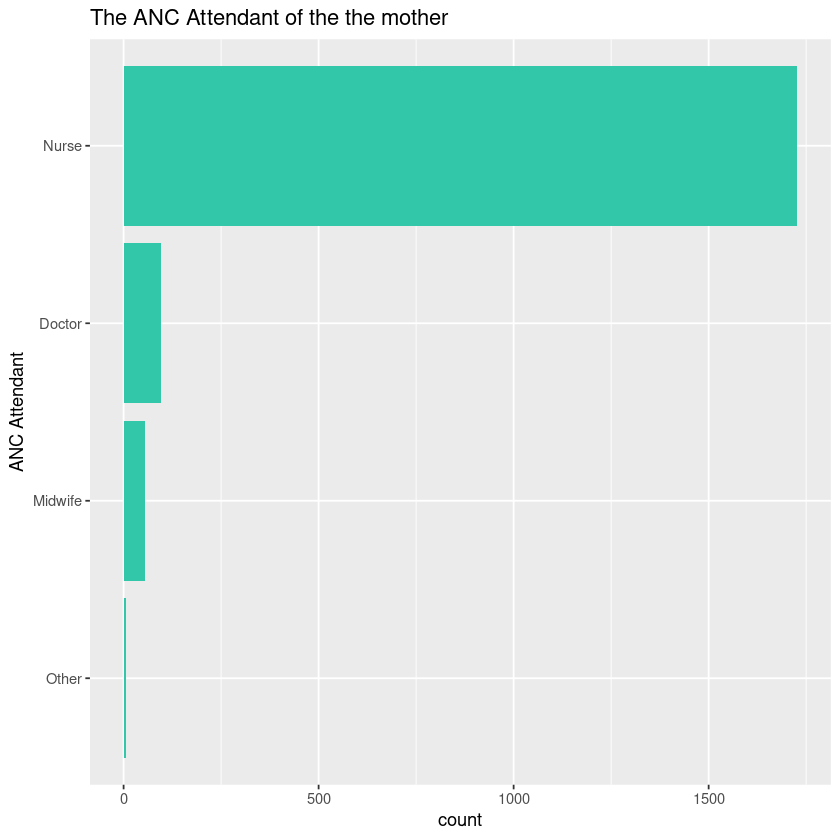

In [18]:
Preterm%>%
  group_by(anc.attendant)%>%
  summarize(count=n())%>%
ggplot(aes(x = reorder(anc.attendant,count), y = count))+
  geom_bar(stat="identity", fill="#32C7A9")+
  coord_flip()+
  labs(x='ANC Attendant', title = 'The ANC Attendant of the the mother')

**Majority of the mothers were attended to by a Nurse.**

# Numeric data
## mother's age

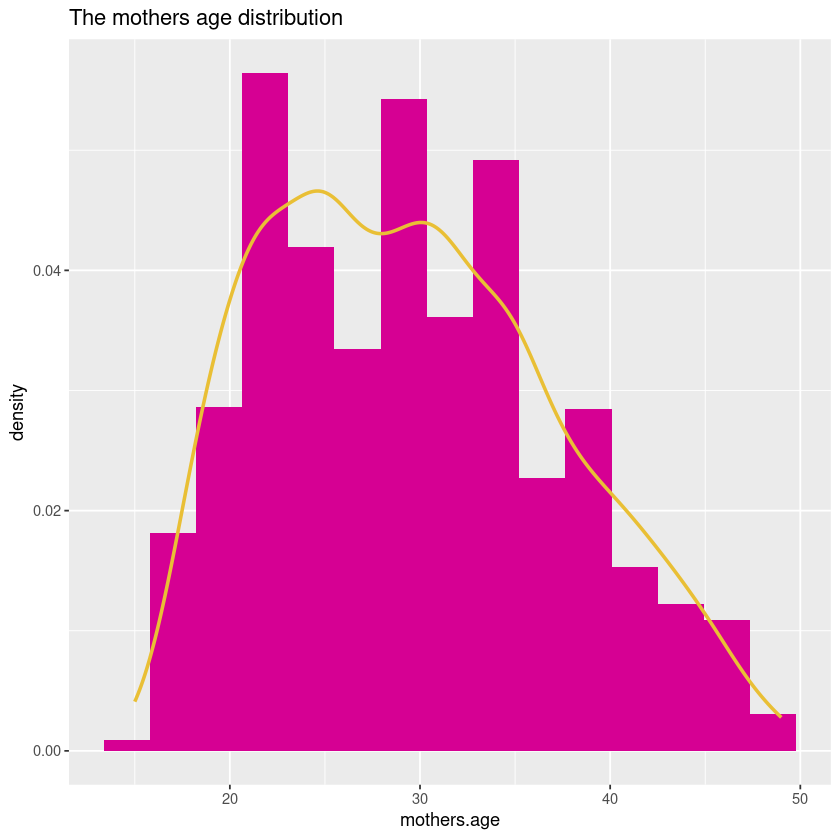

In [19]:
Preterm%>%
  ggplot(aes(mothers.age))+
  geom_histogram(aes(y=after_stat(density)),bins=15, fill="#D60093")+
  geom_density(lwd=1, color="#E9BF35")+
  labs(x='mothers.age', title = 'The mothers age distribution')

**The age distribution is right skewed with most mothers between the age of 25 and 35 years.**

## number.of.anc.visits

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


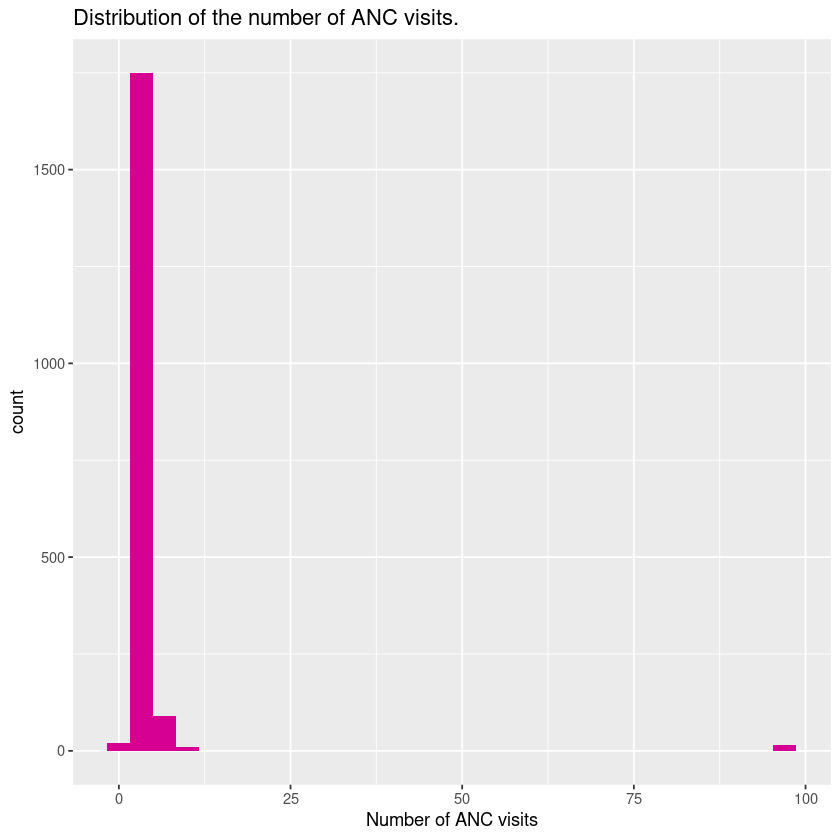

In [20]:
Preterm%>%
  ggplot(aes(number.of.anc.visits))+
  geom_histogram(fill="#D60093")+
  labs(x='Number of ANC visits', title = 'Distribution of the number of ANC visits.')

**There are some outliers in the data.**

**Find out how many observations are outliers**

In [21]:
table(Preterm$number.of.anc.visits)


  1   2   3   4   5   6   7   8   9  10  98 
 20  81 499 912 257  66  13  11   8   1  15 

**Find out if they are preterm or not**

In [22]:
table(Preterm$number.of.anc.visits,Preterm$preterm)

    
       0   1
  1   17   3
  2   70  11
  3  439  60
  4  838  74
  5  237  20
  6   65   1
  7   13   0
  8   11   0
  9    8   0
  10   1   0
  98  15   0

**The values are all not preterm, so we can just drop them.**

In [23]:
Preterm=Preterm%>%
  filter(!number.of.anc.visits>10)

**Plot number.of.anc.visits without the outlier**

Warning message in geom_histogram(stat = "count", fill = "#D60093"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


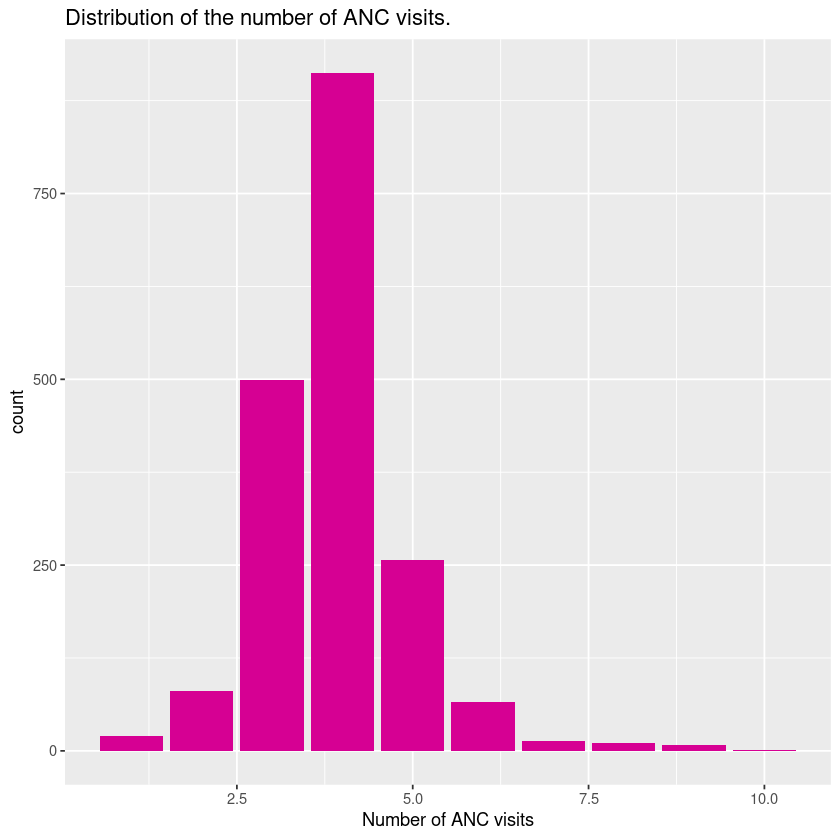

In [24]:
Preterm%>%
  ggplot(aes(number.of.anc.visits))+
  geom_histogram(stat="count", fill="#D60093")+
  labs(x='Number of ANC visits', title = 'Distribution of the number of ANC visits.')

**Replace 10 with 9**

In [25]:
Preterm$number.of.anc.visits=ifelse(Preterm$number.of.anc.visits==10,9,Preterm$number.of.anc.visits)

**Plot number.of.anc.visits again**

Warning message in geom_histogram(stat = "count", fill = "#D60093"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


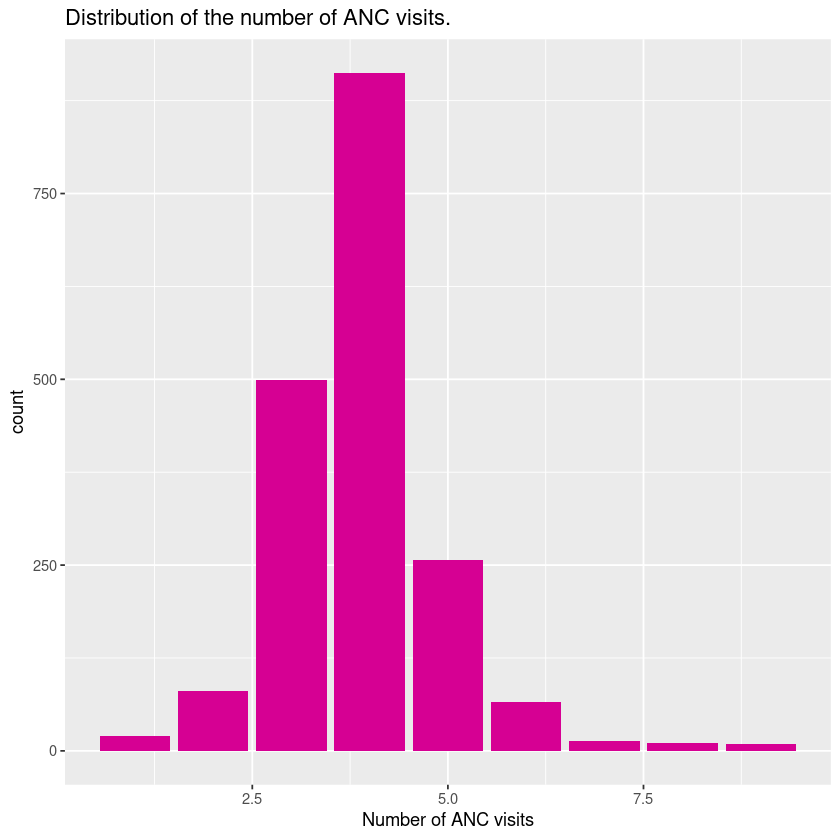

In [26]:
Preterm%>%
  ggplot(aes(number.of.anc.visits))+
  geom_histogram(stat="count", fill="#D60093")+
  labs(x='Number of ANC visits', title = 'Distribution of the number of ANC visits.')

**The distribution of the number of ANC visits is right skewed and majority of mothers attended atleast 4 ANC visits.**

## mothers.age VS number.of.anc.visits

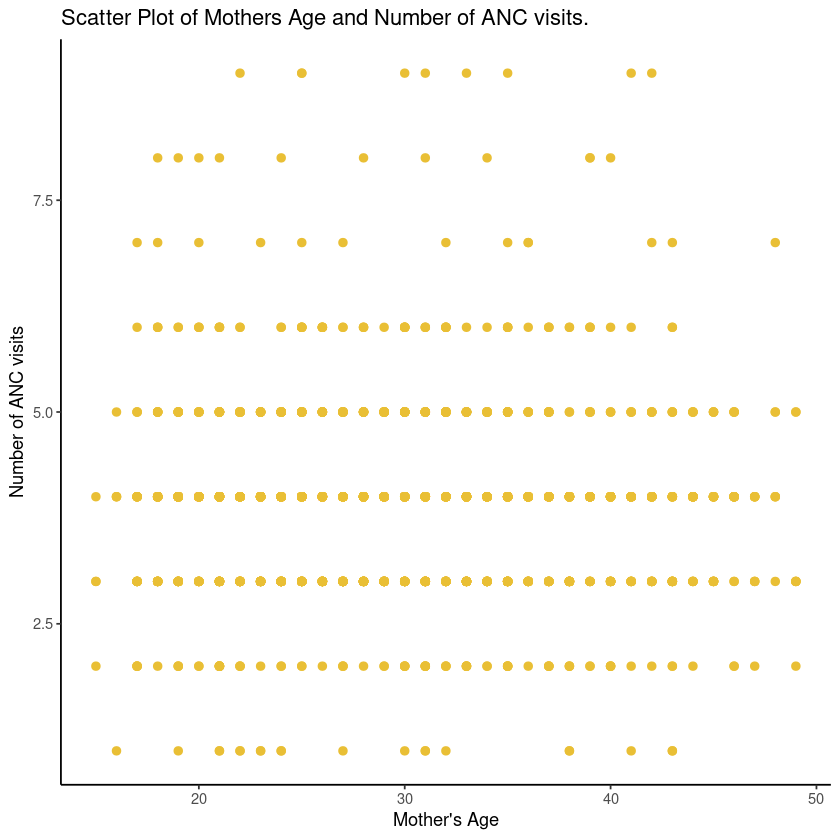

In [27]:
Preterm%>%
  ggplot(aes(mothers.age,number.of.anc.visits))+
  geom_point(color="#E9BF35", size=2)+
  labs(x="Mother's Age", y='Number of ANC visits', title = 'Scatter Plot of Mothers Age and Number of ANC visits.')+
  theme_classic()

**There appears to be no linear relationship between mother's age and the number of anc visits she makes.**

#  compare mother's age with other categorical variables
## education

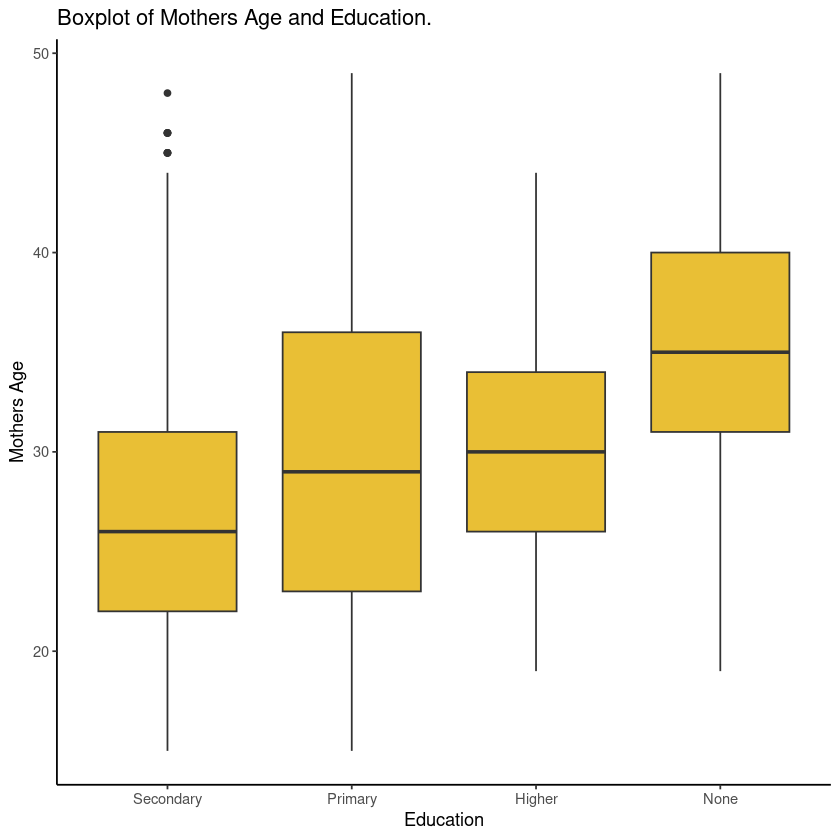

In [28]:
Preterm%>%
  ggplot(aes(reorder(education,mothers.age),mothers.age))+
  geom_boxplot(fill="#E9BF35")+
  labs(x="Education", y='Mothers Age', title = 'Boxplot of Mothers Age and Education.')+
  theme_classic()

## ethinicity

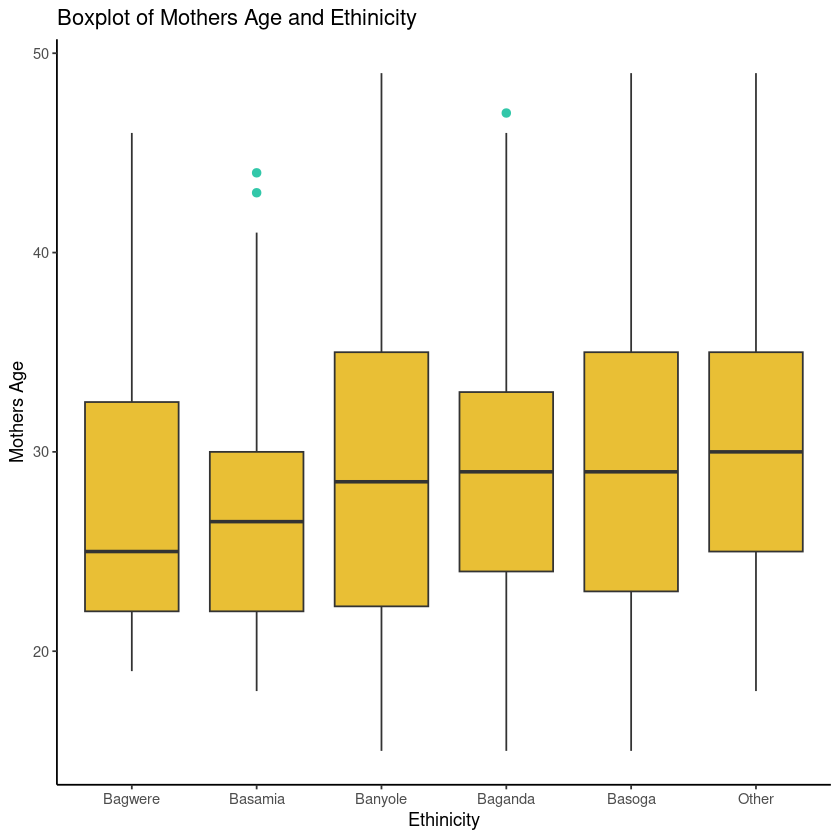

In [29]:
Preterm%>%
  ggplot(aes(reorder(ethinicity,mothers.age,median),mothers.age))+
  geom_boxplot(fill="#E9BF35", outlier.color= "#32C7A9",
               outlier.size =2 )+
   labs(x="Ethinicity", y='Mothers Age', title = 'Boxplot of Mothers Age and Ethinicity')+
  theme_classic()

## anc.attendant

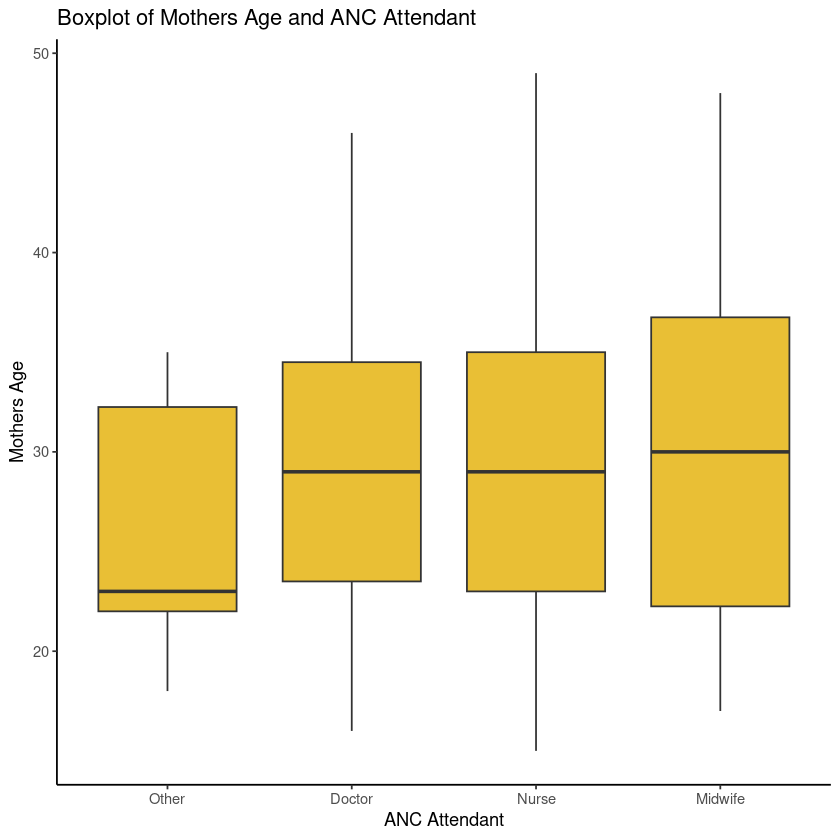

In [30]:
Preterm%>%
  ggplot(aes(reorder(anc.attendant,mothers.age,median),mothers.age))+
  geom_boxplot(fill="#E9BF35")+
   labs(x="ANC Attendant", y='Mothers Age', title = 'Boxplot of Mothers Age and ANC Attendant')+
  theme_classic()

## place.of.anc

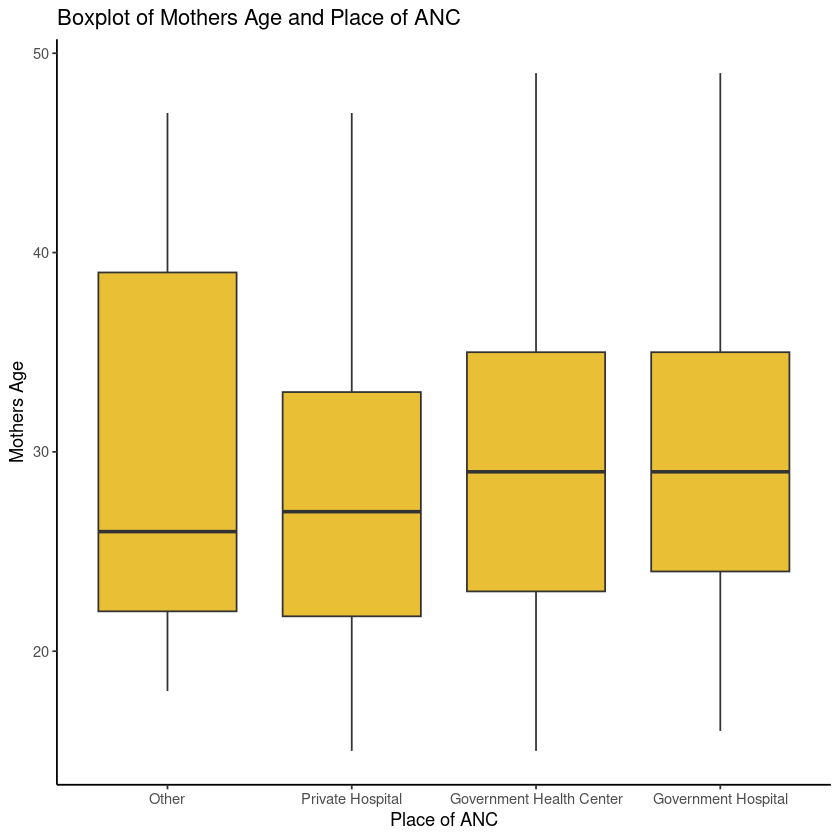

In [31]:
Preterm%>%
  ggplot(aes(reorder(place.of.anc,mothers.age,median),mothers.age))+
  geom_boxplot(fill="#E9BF35")+
   labs(x="Place of ANC", y='Mothers Age', title = 'Boxplot of Mothers Age and Place of ANC')+
  theme_classic()

## preterm

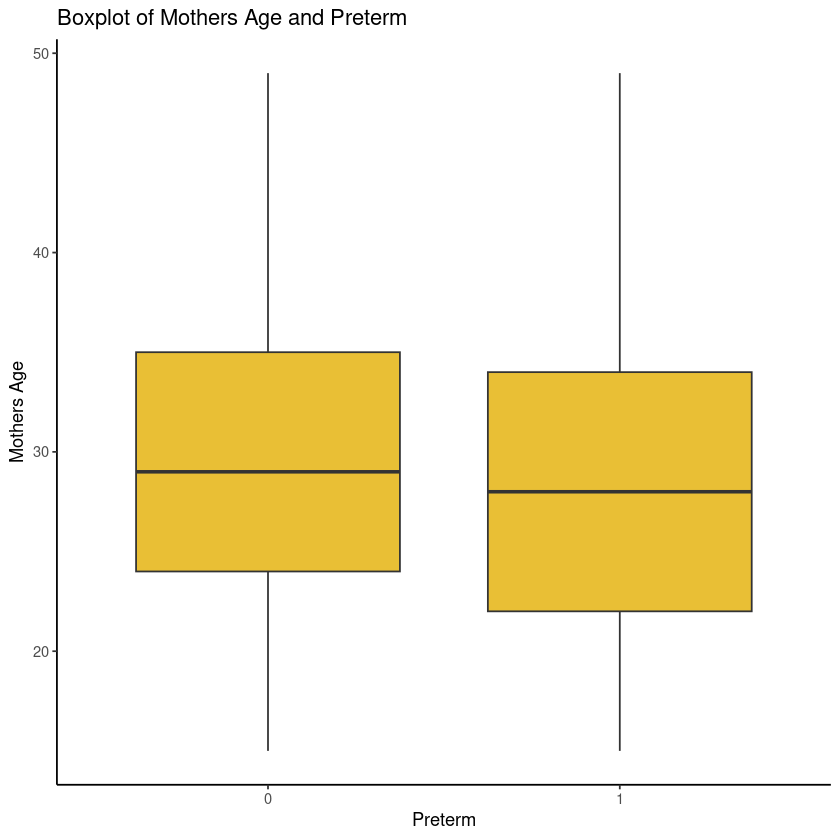

In [32]:
Preterm%>%
  ggplot(aes(reorder(preterm,-mothers.age,median),mothers.age))+
  geom_boxplot(fill="#E9BF35")+
   labs(x="Preterm", y='Mothers Age', title = 'Boxplot of Mothers Age and Preterm')+
  theme_classic()

**The median age of mothers who had preterm delivery(1) was lower than that of mothers who did not have preterm delivery(0).**

# Build a machine learning model

In [36]:
install.packages("randomForest")
require(randomForest)
require(caret)

Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/randomForest_4.7-1.1.tar.gz' ...
	OK [downloaded 256.8 Kb in 1.6 secs]
Installing randomForest [4.7-1.1] ...
	OK [installed binary]
Moving randomForest [4.7-1.1] into the cache ...
	OK [moved to cache in 0.32 milliseconds]


Loading required package: randomForest

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


The following object is masked from ‘package:dplyr’:

    combine




## Divide into Train and Test datasets

In [37]:
set.seed(1234)
pre <- sample(2, nrow(Preterm),replace = TRUE,prob = c(0.7,0.3))
Train <- Preterm[pre==1,]
Test <- Preterm[pre==2,]

## Random Forest

In [38]:
rf=randomForest(preterm~mothers.age+education+religion+ethinicity+number.of.anc.visits+anc.attendant+place.of.anc, Preterm)

## predict the preterm using the Test dataset

In [39]:
preterm.predicted=predict(rf,Test)

## View Predicted values

In [40]:
preterm.predicted

1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0 
101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 
  0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0 
121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 
  0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 
  0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 
  0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 
  0   0   0   0   0   1   0   0   0   1   0   0   0   0   0   0   0   0   0   0 
281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 
  0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379 380 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
401 402 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439 440 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456 457 458 459 460 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
461 462 463 464 465 466 467 468 469 470 471 472 473 474 475 476 477 478 479 480 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
481 482 483 484 485 486 487 488 489 490 491 492 493 494 495 496 497 498 499 500 
  0   0   0   0   0   0   0   0  

## model performance

In [41]:
Trf <- table(PredictedValue=preterm.predicted, ActualValue=Test$preterm)
print(confusionMatrix(Trf))

Confusion Matrix and Statistics

              ActualValue
PredictedValue   0   1
             0 485  35
             1   0  10
                                          
               Accuracy : 0.934           
                 95% CI : (0.9094, 0.9536)
    No Information Rate : 0.9151          
    P-Value [Acc > NIR] : 0.06554         
                                          
                  Kappa : 0.3434          
                                          
 Mcnemar's Test P-Value : 9.081e-09       
                                          
            Sensitivity : 1.0000          
            Specificity : 0.2222          
         Pos Pred Value : 0.9327          
         Neg Pred Value : 1.0000          
             Prevalence : 0.9151          
         Detection Rate : 0.9151          
   Detection Prevalence : 0.9811          
      Balanced Accuracy : 0.6111          
                                          
       'Positive' Class : 0               
            

# Model improvement
**I will now adjust the parameters of the model and rerun the model and see if there is any improvement.**

In [42]:
rf2=randomForest(preterm~mothers.age+education+religion+ethinicity+number.of.anc.visits+anc.attendant+place.of.anc, Preterm, ntree=500, mtry=3, nodesize=0.01*nrow(Test))

## predict the preterm using the Test dataset

In [43]:
preterm.predicted2=predict(rf2,Test)

## view Predicted values

In [44]:
preterm.predicted2

1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 
  0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0 
121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 
  0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 
  0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379 380 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
401 402 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439 440 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456 457 458 459 460 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
461 462 463 464 465 466 467 468 469 470 471 472 473 474 475 476 477 478 479 480 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
481 482 483 484 485 486 487 488 489 490 491 492 493 494 495 496 497 498 499 500 
  0   0   0   0   0   0   0   0  

## model performance

In [45]:
Trf2 <- table(PredictedValue=preterm.predicted2,
              ActualValue=Test$preterm)
print(confusionMatrix(Trf2))

Confusion Matrix and Statistics

              ActualValue
PredictedValue   0   1
             0 485  41
             1   0   4
                                          
               Accuracy : 0.9226          
                 95% CI : (0.8965, 0.9439)
    No Information Rate : 0.9151          
    P-Value [Acc > NIR] : 0.298           
                                          
                  Kappa : 0.1515          
                                          
 Mcnemar's Test P-Value : 4.185e-10       
                                          
            Sensitivity : 1.00000         
            Specificity : 0.08889         
         Pos Pred Value : 0.92205         
         Neg Pred Value : 1.00000         
             Prevalence : 0.91509         
         Detection Rate : 0.91509         
   Detection Prevalence : 0.99245         
      Balanced Accuracy : 0.54444         
                                          
       'Positive' Class : 0               
            

**There is a slight improvement in the model performance.**

# variable importance

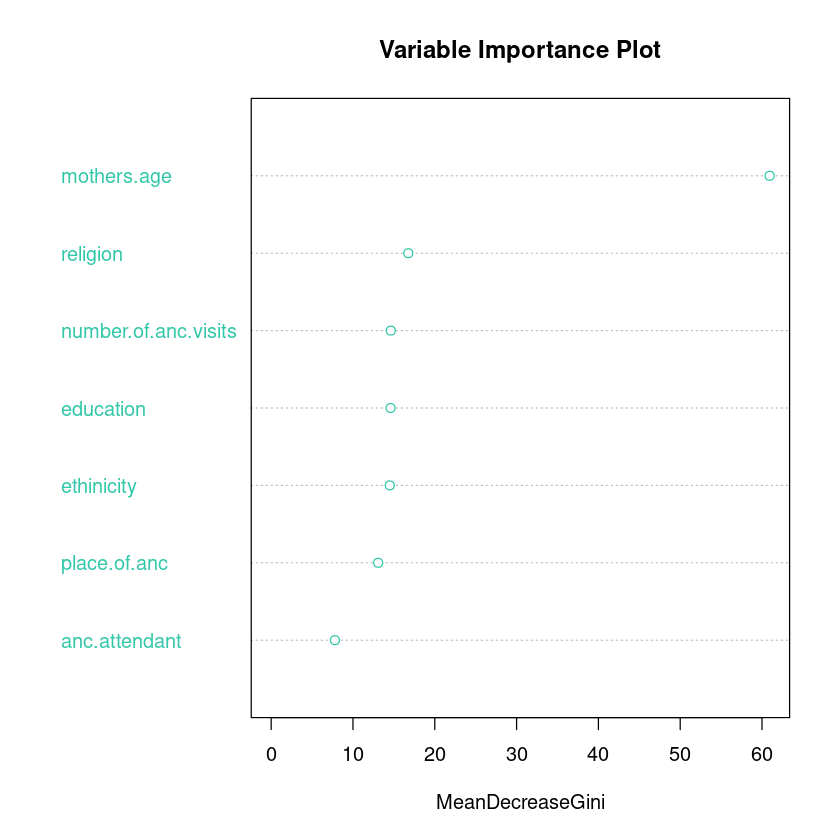

In [46]:
varImpPlot(rf2, main = "Variable Importance Plot", col="#32C7A9")

**The mother's age was the most important variable in predicting preterm birth;this was followed by religion, education, number.of.anc.visits and ethinicity as the top five predictors of preterm birth.**

**place.of.anc and anc.attendant were least important predictors of preterm delivery.**

# Conclusion
**The Random forest model here gives us the mother's age as a key determinant of preterm birth.**

# Recommendation
**Based on this finding; I suggest that policy makers design programs that are focused on addressing the age specific needs of the mothers in rural communities.**
